In [1]:
import re
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

In [2]:
# Text key has the actual tweets. We saved text in separate file 'text.txt'

tweets = []
with open("text.txt",'r',encoding='utf-8') as f:
    for line in f:
        if line != '\n':
            tweets.append(line)

In [6]:
for i in range(10):
    print(tweets[i])

RT @mayursejpal: WHO IS MORE DANGEROUS FOR INDIA? 

Need 1cr Votes... RT pls...

#PakStandsWithKejriwal #SurgicalSelfGoal

RT @thebobbydeoll: The most embarrassing question you can ask a delhite now a days is, "did you vote for AAP?"

#PakStandsWithKejriwal

RT @SirJadejaaaa: 2 Minutes Of Silence For People Who Voted For AAP - Aam Aadmi Of Pakistan. ;)

 #PakStandsWithKejriwal 

 #IndiaStandsAgai…

RT @Komal_Indian: Pakistan is as confused as always 😂

Decide karlo #WeLoveYouModi or #PakStandsWithKejriwal ?? 😂😂



# Using regular expression to filter url and 'RT' from text

In [7]:
# Text contains 'RT' for every retweet and url refrences 
# We want to remover 'RT' and URL

filteredTweet = []
def regularExpression(textToFilter):

    retweetPattern = 'RT|@RT'
    urlPattern = 'https://[a-zA-Z0-9+&@#/%?=~_|!:,.;]*'

    for textLine in textToFilter:
        tweet = re.sub(retweetPattern,'',textLine)
        tweet = re.sub(urlPattern,'',tweet)
        filteredTweet.append(tweet)
        
regularExpression(tweets)

# Extracting hashtags from tweets

In [8]:
hashtag = []
def hashtags(tweet):
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    
    for t in tweet:
        tags = re.findall(hashtagPattern,t)
        if len(tags) != 0:
            hashtag.append(tags)
        
hashtags(filteredTweet)

# Extracting mentioned users in tweet e.g @someuser

In [9]:
user = []
def users(tweet):
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    
    for t in tweet:
        u = re.findall(usersPattern,t)
        user.append(u)
        
users(filteredTweet)


# Use of NLTK to tokenize word and removing stopwords

In [10]:
filteredSentence = []
def nltkTokenizer(textToTokenize):
    
    usersPattern = re.compile('@[a-zA-Z0-9]*',re.UNICODE)
    hashtagPattern = re.compile('#[a-zA-Z0-9]*',re.UNICODE)
    stop_words = stopwords.words('english')
    
    for textLine in textToTokenize:
        words = re.sub(usersPattern,'',textLine)
        words = re.sub(hashtagPattern,'',words)
        words = word_tokenize(words)
        for w in words:
            if w not in stop_words and w not in '@' and w not in '#':
                filteredSentence.append(w)
    
nltkTokenizer(filteredTweet)

In [13]:
hashtagList = list(itertools.chain.from_iterable(hashtag))
hashtagCount = {}

for h in hashtagList:
    if h in hashtagCount:
        hashtagCount[h] +=1
    else:
        hashtagCount[h] = 1

In [14]:
# Extracting hastags that occurs more than 1000 times

hashtagCount = { k : v for k,v in hashtagCount.items() if v >1000}
name = [k for k in hashtagCount if k ]
value = [v for v in hashtagCount.values()]


<IPython.core.display.Javascript object>


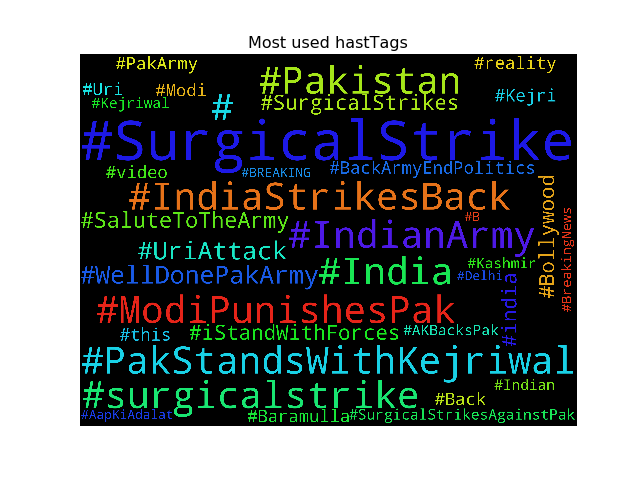

In [15]:
# Plotting top 50 hastgas 

wordcloud = WordCloud(width= 4000,height= 3000,max_words=50).generate_from_frequencies(hashtagCount.items())

%matplotlib nbagg
plt.imshow(wordcloud)
plt.title('Most used hastTags')
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


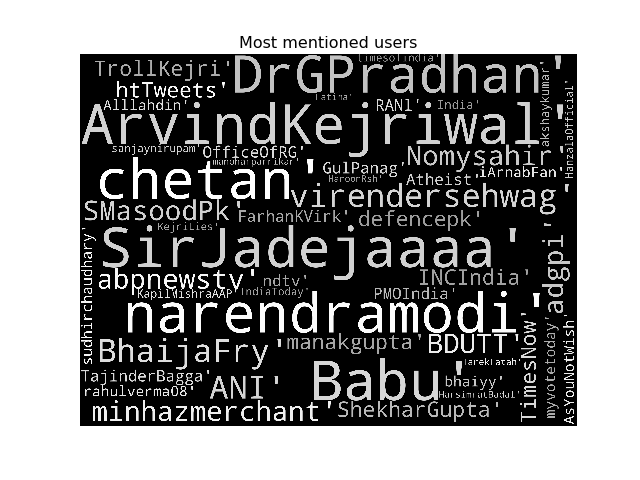

In [16]:
# Plotting top 50 mentioned users in tweet

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

str1 = ' '.join(str(e) for e in user)

%matplotlib nbagg
wordcloud = WordCloud(width= 4000,height= 3000,max_words=50).generate(str1)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
plt.title('Most mentioned users')
plt.axis("off")
plt.show()

<IPython.core.display.Javascript object>


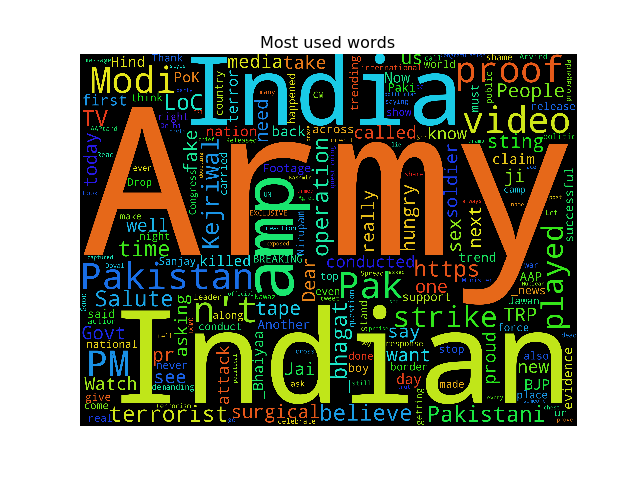

In [17]:
# Top 200 used words 

str1 = ' '.join(str(e) for e in filteredSentence)
wordcloud = WordCloud(width= 4000,height= 3000,max_words=200).generate(str1)

%matplotlib nbagg
plt.imshow(wordcloud)
plt.title('Most used words')
plt.axis("off")
plt.show()